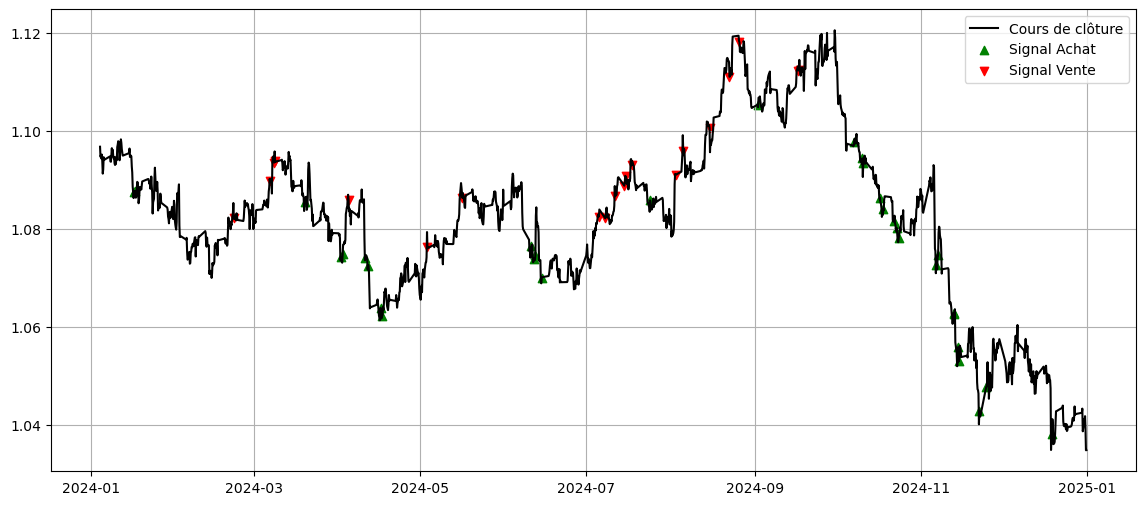

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta

# On lit et on met en forme le dataframe
# Séparation des colonnes csv, renommage des colonnes, suppression de la première ligne comme header
df = pd.read_csv("data/eurusd.csv",  sep="\t", names=['hour', 'open', 'high', 'low', 'close', 'tick', 'volume', 'spread'], header=0)

# On type la colonne date en datetime
df['datetime'] = pd.to_datetime(df.index + ' ' + df['hour'])
df['datetime'] = pd.to_datetime(df['datetime'],  format='%Y.%m.%d %H:%M')

# On set l'index à la colonne date
df.set_index('datetime', inplace=True)

# On garde uniquement les colonne OHLC pour la stratégie
df = df[['open', 'high', 'low', 'close']]

df['rsi'] = ta.rsi(df['close'], length=14)

cross_up = (df['rsi'].shift(1) < 30) & (df['rsi'] > 30)
cross_down = (df['rsi'].shift(1) > 70) & (df['rsi'] < 70)

df['signal'] = 0
df.loc[cross_up, 'signal'] = 1
df.loc[cross_down, 'signal'] = -1

df = df.dropna()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['close'], label='Cours de clôture', color='black')

# Visualisation du RSI
# plt.plot(df.index, df['rsi'], label='RSI 14', color='purple')
# plt.axhline(70, linestyle='--', color='red', label='Surachat (70)')
# plt.axhline(30, linestyle='--', color='green', label='Survente (30)')

# Signaux d'achat (RSI croise 30 vers le haut)
plt.scatter(df.index[df['signal'] == 1], df['close'][df['signal'] == 1],
            marker='^', color='green', label='Signal Achat')

# Signaux de vente (RSI croise 70 vers le bas)
plt.scatter(df.index[df['signal'] == -1], df['close'][df['signal'] == -1],
            marker='v', color='red', label='Signal Vente')

plt.legend()
plt.grid(True)
plt.show()